## Traffic Rank

### Viewing Chicago Taxi Rides 

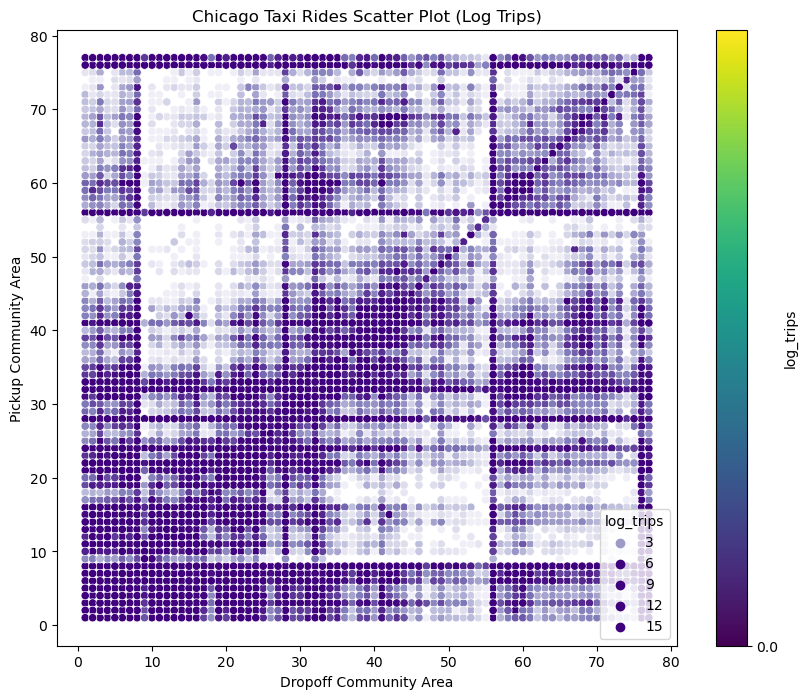

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load the data from the downloaded file
taxi_data = pd.read_csv('chicago-taxi-rides.csv')

# Apply logarithmic transformation to the number of trips for better visualization
taxi_data['log_trips'] = np.log1p(taxi_data['trips'])  # log1p to handle zero values

# Normalize the hue values to match the desired range in the color scale (0.0 to 6.0)
norm = plt.Normalize(vmin=0, vmax=6)  # Normalize hue to 0-6 range

# Create scatter plot
plt.figure(figsize=(10, 8))
scatter = sns.scatterplot(x='dropoff_community_area', y='pickup_community_area', hue='log_trips',
                          palette='Purples', data=taxi_data, hue_norm=norm)

# Customize the colorbar with specific ticks: 0.0, 1.5, 3.0, 4.5, 6.0
cbar = plt.colorbar(scatter.collections[0], ticks=[0.0, 1.5, 3.0, 4.5, 6.0])
cbar.set_label('log_trips')

# Add labels and title
plt.xlabel('Dropoff Community Area')
plt.ylabel('Pickup Community Area')
plt.title('Chicago Taxi Rides Scatter Plot (Log Trips)')

# Show plot
plt.show()


[15 points] The given data has rows (i, j, Tij), sometimes known as Coordinate format. It is supported by many libraries, SciPy.sparse.coo_matrix among them. Since the matrix is just 77 × 77, a “big data” technique is not required here. Read the data as a matrix.

In [7]:
import pandas as pd
from scipy.sparse import coo_matrix

# Load the data from the CSV
taxi_data = pd.read_csv('chicago-taxi-rides.csv')

# Check the maximum values in both columns to ensure they are within the valid range (0-76)
print("Max pickup_community_area:", taxi_data['pickup_community_area'].max())
print("Max dropoff_community_area:", taxi_data['dropoff_community_area'].max())

# Filter out rows where the community areas exceed 77
taxi_data = taxi_data[(taxi_data['pickup_community_area'] <= 76) & (taxi_data['dropoff_community_area'] <= 76)]

# Define the number of community areas (fixed to 77)
n_areas = 77

# Create a sparse matrix in Coordinate (COO) format
# Rows: Pickup areas, Columns: Dropoff areas, Data: Number of trips
rows = taxi_data['pickup_community_area']
cols = taxi_data['dropoff_community_area']
data = taxi_data['trips']

# Create the sparse matrix
traffic_matrix = coo_matrix((data, (rows, cols)), shape=(n_areas, n_areas)).toarray()

# Display the matrix
print(traffic_matrix)


Max pickup_community_area: 77.0
Max dropoff_community_area: 77
[[     0      0      0 ...      0      0      0]
 [     0 110697  40535 ...      7      5  13054]
 [     0  28110 169484 ...      0      6  10569]
 ...
 [     0      0      1 ...    198     19     17]
 [     0      2      3 ...     25    635     53]
 [     0  35848  30926 ...    293    458 590584]]


[15 points] Using your formulation of the TrafficRank algorithm, calculate the rankings of the Chicago community areas after 0, 1, 2, 3, 4, 5 and 6 iterations of the algorithm. 

In [8]:
import numpy as np

# Define the decaying factor
beta = 0.85
n = traffic_matrix.shape[0]

# Initialize rank values equally
ranks = np.ones(n) / n

# TrafficRank calculation for 6 iterations
for iteration in range(7):  # 0 to 6 iterations
    new_ranks = np.zeros(n)
    
    # Iterate through the matrix to calculate new rank values
    for i in range(n):
        column_sum = traffic_matrix[:, i].sum()
        
        # Avoid division by zero by skipping or adjusting for columns with zero sum
        if column_sum != 0:
            new_ranks += beta * (traffic_matrix[:, i] / column_sum) * ranks[i]
        else:
            # If column sum is zero, we skip it or distribute its rank equally (random surfer)
            new_ranks += 0

    # Handle the random surfer component (1 - beta)
    new_ranks += (1 - beta) / n
    
    # Update ranks
    ranks = new_ranks
    
    # Output the ranks after each iteration
    print(f"Ranks after iteration {iteration}:")
    print(ranks)


Ranks after iteration 0:
[0.00194805 0.00780305 0.00990148 0.01638502 0.00911554 0.00815988
 0.04154762 0.025505   0.13132504 0.00247656 0.00556252 0.01147121
 0.00392829 0.00559297 0.0086353  0.00643083 0.01128081 0.00442317
 0.00346324 0.00467488 0.00318777 0.00849847 0.01664205 0.00417195
 0.03087199 0.00595826 0.00360546 0.00422135 0.07298676 0.0036128
 0.00456502 0.00572566 0.12390832 0.02290432 0.0060048  0.00889597
 0.00445447 0.00482335 0.00752672 0.01082822 0.0051279  0.02399884
 0.00808116 0.00973926 0.01192645 0.00517431 0.00538702 0.004001
 0.00632729 0.0103511  0.00505057 0.00650972 0.0032533  0.00519808
 0.00439688 0.00401871 0.05106559 0.0042968  0.00566483 0.01073734
 0.00454526 0.00513299 0.00394309 0.00412247 0.00493143 0.0039684
 0.00488141 0.0052648  0.00560739 0.00788799 0.00515264 0.00500586
 0.00304247 0.00452646 0.0026505  0.00366976 0.0512978 ]
Ranks after iteration 1:
[0.00194805 0.00609163 0.00748513 0.01563421 0.00733895 0.00763061
 0.0493078  0.0357487  0.2

[15 points] An alternate measure of economic rank of an area might be the inverse of a “hardship index,” defined and quantified here. How well, or poorly, do your calculations of TrafficRank for Chicago community areas correspond with the inverse of hardship index? Give a qualitative analysis in plain English.


Number of ranks: 77
Number of hardship_index: 77
    Community Area  TrafficRank (log)  Inverse Hardship Index
0                1           0.001946                0.025381
1                2           0.004792                0.021142
2                3           0.005198                0.031746
3                4           0.014001                0.046083
4                5           0.005770                0.059172
..             ...                ...                     ...
72              73           0.002153                0.023095
73              74           0.002498                0.039062
74              75           0.002062                0.027248
75              76           0.002273                0.029586
76              77           0.045706                0.034602

[77 rows x 3 columns]
R-squared: 0.1175370694711313


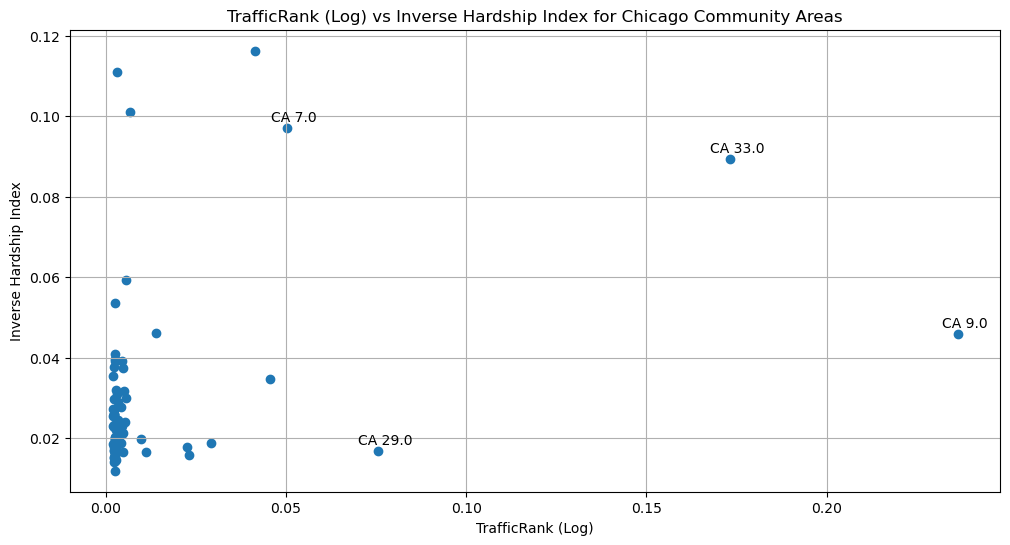

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression  # Import LinearRegression


# TrafficRank results after 6 iterations (replace with your actual final TrafficRank values)
traffic_rank = np.array([
    0.00194805, 0.0048037, 0.00521148, 0.01409944, 0.00578656, 0.00687414,
    0.05164961, 0.04236718, 0.26667495, 0.00204635, 0.00286565, 0.00478151,
    0.00240562, 0.0029054, 0.00440995, 0.00317413, 0.00579602, 0.00245707,
    0.00222416, 0.0025596, 0.00222682, 0.00463728, 0.01130025, 0.00254804,
    0.02974212, 0.0028443, 0.00226055, 0.00243308, 0.07855548, 0.00231808,
    0.00251838, 0.00323035, 0.18910124, 0.02340024, 0.00347435, 0.00427485,
    0.00252511, 0.00254866, 0.00334522, 0.00482727, 0.00266624, 0.00994339,
    0.0035427, 0.00396086, 0.00464357, 0.00264321, 0.002696, 0.00233722,
    0.00294138, 0.0045951, 0.00257747, 0.00297277, 0.00217643, 0.0026316,
    0.0024057, 0.00233052, 0.0227573, 0.00241855, 0.00279393, 0.00549304,
    0.00266807, 0.00264336, 0.00234946, 0.00236995, 0.0025655, 0.00233998,
    0.00254356, 0.00266139, 0.00276396, 0.00339301, 0.00260952, 0.00261109,
    0.00215514, 0.0025012, 0.00206385, 0.0022758, 0.04676693
])

print("Number of ranks:", len(traffic_rank))

# Hardship Index data for the 77 community areas (replace with actual values from the document)
hardship_index = np.array([
    39.4, 47.3, 31.5, 21.7, 16.9, 9.9, 10.3, 8.6, 21.8, 28.2, 31.3, 26.7, 42.8, 45.7, 
    36.2, 32.3, 33.4, 43.9, 55.9, 54.3, 38.6, 25.6, 60.3, 18.7, 53.1, 68.3, 58.9, 26.6, 
    59.8, 70.6, 50.1, 9.0, 11.2, 63.5, 42.5, 53.2, 64.9, 49.8, 34.6, 60.2, 25.3, 50.4, 51.4, 
    47.9, 47.6, 54.9, 51.2, 38.4, 52.6, 43.3, 58.1, 56.7, 54.3, 84.2, 37.0, 38.7, 56.1, 
    66.1, 51.5, 41.9, 62.6, 49.2, 65.3, 38.8, 53.7, 59.2, 63.3, 70.5, 54.3, 40.8, 51.5, 
    24.5, 43.3, 25.6, 36.7, 33.8, 28.9
])

print("Number of hardship_index:", len(hardship_index))


# Compute the inverse of the Hardship Index
inverse_hardship = 1 / hardship_index

# Normalizing TrafficRank values (log transformation to deal with skewed data)
traffic_rank_log = np.log1p(traffic_rank)

# Create a DataFrame to compare TrafficRank and Inverse Hardship Index
df_comparison = pd.DataFrame({
    'Community Area': range(1, 78),
    'TrafficRank (log)': traffic_rank_log,
    'Inverse Hardship Index': inverse_hardship
})

# Display the comparison
print(df_comparison)

# Regression analysis to measure correlation between TrafficRank (log) and Inverse Hardship Index
X = df_comparison['TrafficRank (log)'].values.reshape(-1, 1)
y = df_comparison['Inverse Hardship Index'].values

model = LinearRegression()
model.fit(X, y)
score = model.score(X, y)
print(f"R-squared: {score}")

# Plot the comparison
plt.figure(figsize=(12, 6))
plt.scatter(df_comparison['TrafficRank (log)'], df_comparison['Inverse Hardship Index'])
plt.title('TrafficRank (Log) vs Inverse Hardship Index for Chicago Community Areas')
plt.xlabel('TrafficRank (Log)')
plt.ylabel('Inverse Hardship Index')
plt.grid(True)

# Highlight outliers with annotations
outliers = df_comparison[df_comparison['TrafficRank (log)'] > 0.05]
for _, row in outliers.iterrows():
    plt.annotate(f"CA {row['Community Area']}", (row['TrafficRank (log)'], row['Inverse Hardship Index']),
                 textcoords="offset points", xytext=(5, 5), ha='center')

plt.show()

The R-squared value of 0.1175 indicates a weak correlation between TrafficRank and the Inverse Hardship Index. This suggests that the economic rank based on hardship index does not strongly correspond to the calculated TrafficRank for these areas.

## Text Processing


### About TDF


[4 points] We can calculate TF values of each word in a given document. Explain why the calculation of IDF can only apply to a corpus, not to a specific document.


IDF applies to a corpus, not a specific document, because it measures how rare or common a term is across all documents in the corpus. It reflects the significance of a word in the entire dataset, not just in one document. A word like "the" may appear frequently in a single document, but its IDF value will be low because it appears in almost every document in the corpus.

[6 points] The implementation of Scikit-Learn’s IDF calculation differs from that of the “standard” calculation. What is the justification for this change?


Scikit-Learn's modification ensures that terms that occur in all documents still get a meaningful IDF score by avoiding division by zero and keeping IDF scores positive. This change stabilizes the calculation, especially for edge cases with extremely rare or common words.

[25 points] Each president has a .tar.gz file containing his speeches. Write a procedure to calculate TF.IDF for any president’s speeches and print the top-15 most important words in their speech. 


In [10]:
import os
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
import re
import requests

# Load stopwords dynamically
def load_stopwords():
    stopwords_url = "https://gist.githubusercontent.com/rg089/35e00abf8941d72d419224cfd5b5925d/raw/12d899b70156fd0041fa9778d657330b024b959c/stopwords.txt"
    stopwords_list = requests.get(stopwords_url).content
    stopwords = set(stopwords_list.decode().splitlines())
    return list(stopwords)

# Function to clean and preprocess text
def clean_text(text):
    text = re.sub(r"[^a-zA-Z0-9\s]", "", text.lower())
    return text

# Function to calculate and print the top 15 most important words in terms of TF-IDF
def calculate_tfidf_for_speech(president, speech_file=None):
    base_dir = f"C:/Users/adity/OneDrive/Tufts University Online MS CS/2024/Fall Sem/CS 119/Quizzes/Quiz3/prez_speeches/{president}"
    
    # Check if a specific speech file is provided or process all speeches of the president
    if speech_file:
        files = [os.path.join(base_dir, speech_file)]  # Use the specific speech file
    else:
        files = [os.path.join(base_dir, f) for f in os.listdir(base_dir) if f.endswith('.txt')]  # Use all speeches
    
    documents = []
    for file in files:
        with open(file, 'r', encoding='utf-8') as f:
            text = f.read()
            documents.append(clean_text(text))
    
    # Initialize TfidfVectorizer
    stopwords = load_stopwords()
    vectorizer = TfidfVectorizer(stop_words=stopwords)
    
    # Fit and transform the documents
    tfidf_matrix = vectorizer.fit_transform(documents)
    
    # Get feature names (words) and scores
    feature_names = vectorizer.get_feature_names_out()
    
    # Calculate the average TF-IDF score for each word across all documents
    avg_tfidf_scores = tfidf_matrix.mean(axis=0).A1
    word_scores = list(zip(feature_names, avg_tfidf_scores))
    
    # Sort by TF-IDF score
    word_scores_sorted = sorted(word_scores, key=lambda x: x[1], reverse=True)
    
    # Print top 15 words by TF-IDF
    print(f"Top 15 important words for {president} (speech: {speech_file or 'all'}):")
    for word, score in word_scores_sorted[:15]:
        print(f"{word}: {score:.5f}")

# Example usage:
# To calculate TF-IDF for a specific speech file of a president
calculate_tfidf_for_speech("lincoln", "lincoln_speeches_000.txt")

# To calculate TF-IDF for all speeches of a president
calculate_tfidf_for_speech("lincoln")


c:\Users\adity\anaconda3\envs\ml135_env_sp21\Lib\site-packages\sklearn\feature_extraction\text.py:408: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['articl', 'mon'] not in stop_words.
  warnings.warn(


Top 15 important words for lincoln (speech: lincoln_speeches_000.txt):
slavery: 0.41468
missouri: 0.24424
nebraska: 0.23721
slave: 0.21437
compromise: 0.19680
free: 0.18625
principle: 0.16868
states: 0.16693
people: 0.16341
slaves: 0.14584
state: 0.14408
man: 0.13178
repeal: 0.13178
country: 0.13003
law: 0.13003
Top 15 important words for lincoln (speech: all):
states: 0.15092
government: 0.09311
people: 0.09254
union: 0.08867
slavery: 0.07910
united: 0.07486
war: 0.06901
state: 0.06882
constitution: 0.06472
congress: 0.06234
great: 0.05900
country: 0.05376
men: 0.05307
year: 0.04539
law: 0.04301


[15 points] Examine the result carefully – at least some of the top TF.IDF words should be historically consistent with what was going on in the country at the time. You only have a slight control over the outcome through starting with an initial set of stopwords and adding more words to the list of stopwords.